# Assignment 1 – Using NLTK and Vader Sentiment Analysis #

### Analysis of News Articles

### Installing all necessary librabries ###

In [12]:
import nltk
import PyPDF2
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from readability import Readability


In [14]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mehekkumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mehekkumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mehekkumar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### Issue at Hand:
Harvard President Claudine Gay faces plagiarism allegations, with over 40 cases reported. Fox News paints it as a major scandal, questioning Harvard’s integrity, while Reuters reports that an internal review found citation errors but no research misconduct. Gay is making corrections and also faces political pressure over a congressional testimony on antisemitism.

#### Reporting Impressions:
Fox News takes a more dramatic and accusatory tone, suggesting Harvard is protecting Gay. Reuters sticks to the facts, focusing on the process and her response. One feels like a scandal, the other like an update on an internal review. 

### Extracting Text ###

In [34]:
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in reader.pages:
            text += page.extract_text() + "\n"
        return text.strip()

# Extract text from both PDFs
fox_news_text = extract_text_from_pdf("/Users/mehekkumar/Desktop/MBA/ADV. PROG/foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf")
reuters_text = extract_text_from_pdf("/Users/mehekkumar/Desktop/MBA/ADV. PROG/reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf")

# Display extracted text (only first 1000 characters to check extraction)
print(fox_news_text)
print("\n" + "="*50 + "\n")
print(reuters_text)


1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism. 
The Washington Free Beacon  reported Harvard "received a complaint outlining over 40
allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's
research integrity of ficer, Stacey Springs, outlining the claims. 
"The document paints a picture of a pattern of misconduct more extensive than has been
previously reported and puts the Harvard Corporation, the unive

#### Anomalies in the extracted text: 
1. Some words appear incorrectly split due to the PDF’s formatting and some words have excessive spaces.
Example: "T uesday" instead of "Tuesday" in the Fox News article.

2. Includes excess content like page numbers,header and footers, URLs, and author information, which are not part of the article’s main content.
Example: "1 / 3Gabriella Borter" appears at the start of the Reuters article.
Headers and footers from the PDF have been extracted as part of the text.

3. Possible missing text: Some text may not be extracted correctly due to the PDF’s formatting style.



### NLKT Sentiment Analysis ###

In [21]:
sia = SentimentIntensityAnalyzer()

# Get sentiment scores for both articles
fox_news_sentiment = sia.polarity_scores(fox_news_text)
reuters_sentiment = sia.polarity_scores(reuters_text)

# Display sentiment results
print("Fox News Sentiment:", fox_news_sentiment)
print("Reuters Sentiment:", reuters_sentiment)


Fox News Sentiment: {'neg': 0.064, 'neu': 0.863, 'pos': 0.073, 'compound': 0.8346}
Reuters Sentiment: {'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}


#### Key Observations

- Fox News: Slightly more positive (0.073) than negative (0.064), with a strong neutral tone (0.863) and a positive overall sentiment (compound: 0.8346). This suggests the article, while critical, may not be overwhelmingly negative.
- Reuters: More negative (0.07) and significantly less positive (0.026), with a high neutral score (0.904) but a strong negative overall sentiment (compound: -0.9719). This indicates the article is framed in a way that carries more negative connotations.

#### Comparing the Sentiment Scores to the Actual Content
I find this result somewhat surprising. Fox News' tone felt more accusatory, emphasizing controversy and questioning Harvard's integrity. Yet, the sentiment analysis suggests it leans in slightly positive. This could be due to language choices that frame the issue as a scandal but not directly condemning Gay.

Reuters, while more neutral in tone, has a strong negative compound score, likely because it emphasizes corrections, investigations, and external pressures on Gay. Though it avoids dramatic phrasing, the underlying facts—plagiarism allegations and political fallout—may have influenced the sentiment score negatively.

### Sentiment analysis on the article headlines

In [43]:
fox_news_headline = "Embattled Harvard University President Claudine Gay hit with more plagiarism charges"
reuters_headline = "Harvard president will submit dissertation edits after plagiarism allegations"

# Get sentiment scores for headlines
fox_headline_sentiment = sia.polarity_scores(fox_news_headline)
reuters_headline_sentiment = sia.polarity_scores(reuters_headline)

# Display sentiment results for headlines
print("Fox News Headline Sentiment:", fox_headline_sentiment)
print("Reuters Headline Sentiment:", reuters_headline_sentiment)


Fox News Headline Sentiment: {'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}
Reuters Headline Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


#### 
Fox News' headline is framed negatively, reinforcing controversy, while Reuters sticks to a purely neutral, factual presentation. This matches the broader tone of each article—Fox News leans into the scandal narrative, while Reuters maintains a non-sensationalist approach with its headline.

### Readability Score ###

In [41]:
from readability import Readability

# Compute readability scores
fox_news_readability = Readability(fox_news_text)
reuters_readability = Readability(reuters_text)

# Select three different readability metrics
fox_flesch = fox_news_readability.flesch().score
fox_gunning_fog = fox_news_readability.gunning_fog().score

reuters_flesch = reuters_readability.flesch().score
reuters_gunning_fog = reuters_readability.gunning_fog().score

# Display results
print("Fox News Readability Scores:")
print("Flesch Reading Ease:", fox_flesch)
print("Gunning Fog Index:", fox_gunning_fog)

print("\nReuters Readability Scores:")
print("Flesch Reading Ease:", reuters_flesch)
print("Gunning Fog Index:", reuters_gunning_fog)



Fox News Readability Scores:
Flesch Reading Ease: 21.41115320671068
Gunning Fog Index: 21.868487077434633

Reuters Readability Scores:
Flesch Reading Ease: 18.384675005023126
Gunning Fog Index: 18.87116736990155


#### Readability Metrics 
- Flesch Reading Ease: Measures how easy a text is to read. Higher scores indicate simpler language, while lower scores suggest complexity. A score below 30 means the text is very difficult to read, typically at a college graduate level.
- Gunning Fog Index: Estimates the number of years of formal education needed to understand the text. A score of 18+ means the text is extremely complex, requiring graduate-level comprehension.

#### Comparing the results
- Fox News:
Flesch Reading Ease (21.41) → Very difficult to read
Gunning Fog Index (21.87) → Graduate-level complexity
The article uses longer sentences and more complex vocabulary, making it harder to digest.

- Reuters:
Flesch Reading Ease (18.38) → Even more difficult to read
Gunning Fog Index (18.87) → Still complex but slightly more readable than Fox
While also difficult, Reuters’ score is marginally easier, likely due to its more neutral and structured language.

### Word Cloud ###

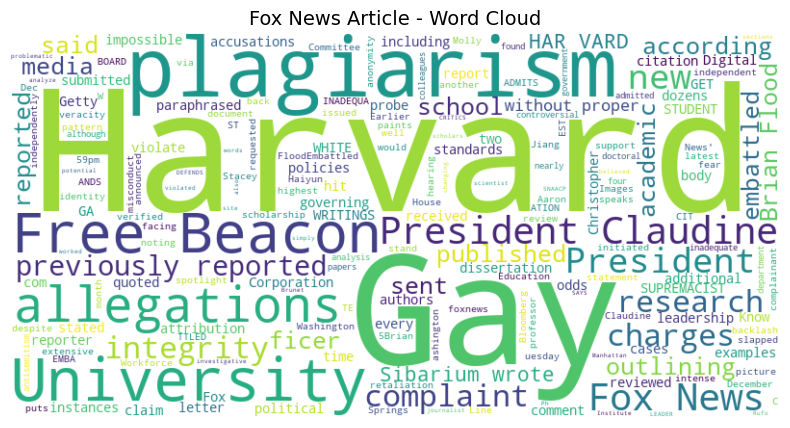

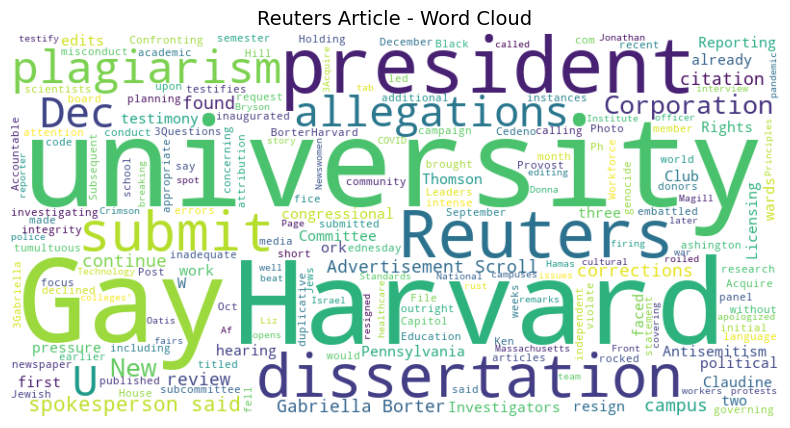

In [45]:
stop_words = set(stopwords.words('english'))

# Function to generate a word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, 
                          background_color='white', 
                          stopwords=stop_words, 
                          colormap='viridis').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

# Generate word clouds for both articles
generate_wordcloud(fox_news_text, "Fox News Article - Word Cloud")
generate_wordcloud(reuters_text, "Reuters Article - Word Cloud")


#### Fox News Word Cloud:

- Key words: "Harvard," "Gay," "plagiarism," "allegations," "integrity," "charges," and "Free Beacon."
- The frequent use of words like "complaint," "reported," "embattled," "hit," "governing," "academic," and "misconduct" suggests a stronger focus on controversy and criticism.

#### Reuters Word Cloud:
- Key words: "Harvard," "Gay," "plagiarism," "allegations," "integrity," "charges," and "Free Beacon."
- The frequent use of words like "complaint," "reported," "embattled," "hit," "governing," "academic," and "misconduct" suggests a stronger focus on controversy and criticism.

